<br>
<div><center><img 
src="https://app.noteable.io/api/image/a6d4759b-d46f-474c-bb39-afcebae5cf94"
width='350px'></img></div>
<br>

# Mahendra Singh Dhoni 🏏 
### 07 JULY 1981, Ranchi, Bihar (Now Jharkand).
#### The journey of Dhana Dan Dhoni-For the love of Thala.








### Embark on an exhilarating journey delving into the vast realm of cricket, specifically exploring the captivating career of the iconic player, Dhoni. Let's immerse ourselves in the extensive collection of matches he has played. By meticulously analyzing this treasure trove of data, we are poised to unlock fascinating insights and revelations about Dhoni's remarkable journey in the world of cricket.

###### Data is limited as I couldnt get access to detailed information. Please note that in some cases, missing data has not been excluded, and data has been used as is. This decision was made because the total record count is less than 1200, and there is no significant benefit in programatically predicting missing data. Null values were removed from the columns during the analysis phase.


In [ ]:
#Import necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Data Source 'https://cricketarchive.com/Archive/Players/7/7561/7561.html'

# Performed basic cleaning of the column headers from the first glance in excel. 
path = 'M.S.Dhoni.csv'
dhoni_df = pd.read_csv(path)

dhoni_df

In [ ]:
dhoni_df.shape

In [ ]:
dhoni_df.head()

In [ ]:
dhoni_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Match        1003 non-null   float64
 1   Innings      981 non-null    float64
 2   Dhoni Score  1123 non-null   object 
 3   Team Score   1115 non-null   object 
 4   Out type     1115 non-null   object 
 5   Fielder      488 non-null    object 
 6   Bowler       662 non-null    object 
 7   Overs        37 non-null     object 
 8   Maidns       37 non-null     object 
 9   Runs         37 non-null     object 
 10  Wickets      37 non-null     object 
 11  Opp Score    1115 non-null   object 
 12  Catches      632 non-null    float64
 13  Stumpings    254 non-null    float64
 14  Match.1      1003 non-null   object 
 15  Date         1003 non-null   object 
 16  Match Id     1003 non-null   object 
 17  Match type   0 non-null      float64
dtypes: float64(5), object(13)
memory usage: 161.8+ K

In [ ]:
#Find missing data percentages in each column
a=dhoni_df.isnull().sum()
b=dhoni_df.isnull().sum()/dhoni_df.shape[0]*100.0
c=b[b>0].round(3)

missing_data=pd.concat([a,c], axis=1)

missing_data

### Key findings from the missing data.

##### Approximately 2% of the data in Dhoni's score contains missing values. However, I am unable to remove these records because they contain valuable information in other cells.

##### There is a pattern in missing data, where 147 records are missing across variables, this is because few test matches has multiple innings and match information is not copied to all innings rows from day 1. In such case we can copy the previous rows data or Ignore if it does'nt add value to analysis. 


#### Drill down a few important columns and understand what the values look like.

Dhoni score, out type etc

In [ ]:
#rename the column names to handle extra space
dhoni_df.rename(columns={'Dhoni Score':'Dhoni_Score'}, inplace=True)
dhoni_df.rename(columns={'Match.1':'Match_Between'}, inplace=True)
dhoni_df.rename(columns={'Out type':'Out_type'}, inplace=True)
dhoni_df.rename(columns={'Match Id':'Match_Id'}, inplace=True)
dhoni_df.rename(columns={'Match type':'Match_type'}, inplace=True)

In [ ]:
dhoni_df.Dhoni_Score.value_counts()

In [ ]:
dhoni_df.Out_type.value_counts()

##### At this point you should have identified the difference in missing records in Dhoni_score column. When the 'IS_NULL' function is used it says 27 missing records, but when checked the data through value_counts function, Interestingly I found 142 records missing. 

##### The reason for this is 'space', there is space in some cells, as the data source is a csv file, it's not trust worthy. This confused the functions to give different numbers. Now we need to figure out a way to clear the space from few cells or figure out what to do with mising data. 

##### In the out_type column there is a value called 'dnb' in 134 records, meaning did not bat. There may be some test innings where not all batsman would get a chance to bat. so the missing data is down to 142-134=8.

##### where did the 8 come from, missing of out_type is 35 and actual blanks in Dhoni score were 27 where he batted, so 35-27=8.

In [ ]:
dhoni_df['Dhoni_Score']=dhoni_df['Dhoni_Score'].str.strip()

In [ ]:
dhoni_df.Dhoni_Score.isnull().sum()

27

In [ ]:
dhoni_df.head()

<br>
<div><center><img src="https://app.noteable.io/api/image/85744a92-9215-4374-b5f1-61c7c93110ca" width='100px'></img></div>
<br>  

#       Data Cleaning 

#### After sorting the missing data issue, lets dig further deep.

#### Observation Findings

1. Dhoni_score column has special character '*', this means not out.
2. out_type column- Give full forms to encoded outtype. 
3. Fielder, bowler,opp score, Match_Between, are not required for analysis.
4. Get year from date for analysis.
5. match_id- derive match_type based on match_id.

Lets drop some columns that are not needed for the analysis.

In [ ]:
%%sql @noteable
select * from dhoni_df

In [ ]:
dhoni_df.drop(['Fielder','Bowler'], axis=1, inplace=True)

In [ ]:
dhoni_df.shape

(1150, 16)

In [ ]:
dhoni_df

#### Removed the * from Dhoni_score variable, as the not-out is captured under outtype, this will help us in getting sum of all score with out errors. 

In [ ]:
dhoni_df['Dhoni_Score'] = dhoni_df['Dhoni_Score'].str.replace('[*\s]', '', regex=True)


In [ ]:
dhoni_df.head(50)

In [ ]:
dhoni_df['Date'] = pd.to_datetime(dhoni_df['Date'])
dhoni_df['Date_year']=dhoni_df['Date'].dt.year

In [ ]:
dhoni_df.head()

In [ ]:
dhoni_df['Match_type'] = dhoni_df['Match_Id'].str.extract(r'([A-Za-z]+)')


In [ ]:
%%sql @noteable
select * from dhoni_df

#### Dropped few more columns that are not required for analysis as we have extracted the relevant information.

In [ ]:
dhoni_df.drop(['Date','Match_Id'], axis=1, inplace=True)

In [ ]:
%%sql @noteable
select * from dhoni_df


In [ ]:
#I often check the rows and columns just to make sure, I am doing what I intend to do.
dhoni_df.shape


(1150, 15)

#### Lets change the data types for few numeric variables.

In [ ]:
dhoni_df.info()
dhoni_df['Dhoni_Score'] = pd.to_numeric(dhoni_df['Dhoni_Score'], errors='coerce')
dhoni_df['Overs'] = pd.to_numeric(dhoni_df['Overs'], errors='coerce')
dhoni_df['Runs'] = pd.to_numeric(dhoni_df['Runs'], errors='coerce')
dhoni_df['Wickets'] = pd.to_numeric(dhoni_df['Wickets'], errors='coerce')
dhoni_df['Maidns'] = pd.to_numeric(dhoni_df['Maidns'], errors='coerce')

#Guess, why I have not used replace or astype arguments here.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match          1003 non-null   float64
 1   Innings        981 non-null    float64
 2   Dhoni_Score    1123 non-null   object 
 3   Team Score     1115 non-null   object 
 4   Out_type       1115 non-null   object 
 5   Overs          37 non-null     object 
 6   Maidns         37 non-null     object 
 7   Runs           37 non-null     object 
 8   Wickets        37 non-null     object 
 9   Opp Score      1115 non-null   object 
 10  Catches        632 non-null    float64
 11  Stumpings      254 non-null    float64
 12  Match_Between  1003 non-null   object 
 13  Match_type     1003 non-null   object 
 14  Date_year      1003 non-null   float64
dtypes: float64(5), object(10)
memory usage: 134.9+ KB


### Now that we have cleaned and prepared the data. Lets jump into fun part of analysis.

Lets look for outliers, Prepare some visuals to see what the data speaks and perform correlations to see if it makes sense.

In [ ]:
dhoni_df.Dhoni_Score.describe()


In [ ]:
#Although it is possible to make 224 score, lets look at the data point direclty and confirm if this score is not an outlier.

score_filter=dhoni_df[dhoni_df['Dhoni_Score']>=224]
score_filter

#Dhoni made this score in a test between India and Australia in 2013.

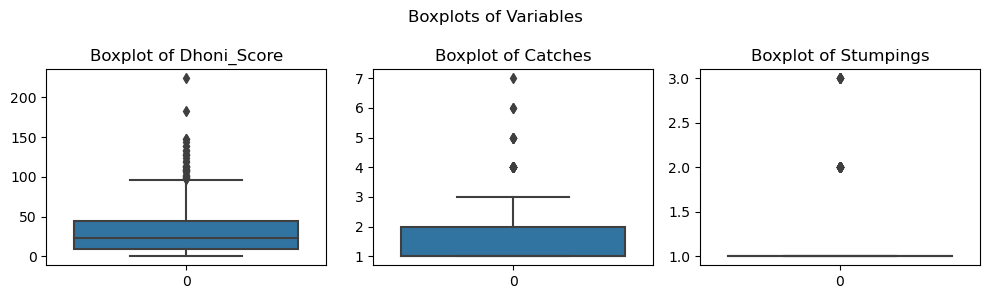

In [ ]:
vars = ['Dhoni_Score', 'Catches', 'Stumpings']

plt.figure(figsize=[10, 3])

# Iterate over each variable and create a new subplot for each boxplot
for i, var in enumerate(vars, start=1):
    ax = plt.subplot(1, len(vars), i)
    sns.boxplot(data=dhoni_df[var], ax=ax)
    plt.title(f"Boxplot of {var}")

# Set the overall title and adjust the layout
plt.suptitle("Boxplots of Variables")
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Create a list to store the labels for each score range
labels = ['<= 0', '<= 50', '> 50 and <= 100', '> 100 and <= 150', '> 150']

# Validate and categorize the data
count_scores = dhoni_df['Dhoni_Score'].apply(lambda x: labels[0] if x <= 0 else
                                             (labels[1] if x <= 50 else
                                              (labels[2] if x <= 100 else
                                               (labels[3] if x <= 150 else
                                                (labels[4] if x > 150 else 'Invalid')))))

# Check for invalid values
invalid_count = count_scores.value_counts().get('Invalid', 0)
if invalid_count > 0:
    print(f"Warning: {invalid_count} invalid values found in 'Dhoni_Score' column.")

# Calculate the count of scores falling into each range
count_scores = count_scores.value_counts().sort_index()

# Display the results
print(count_scores)


<= 0                 46
<= 50               741
> 100 and <= 150     26
> 150                 2
> 50 and <= 100     166
Invalid             169
Name: Dhoni_Score, dtype: int64


In [ ]:
# Calculate the total count (excluding the invalid count)
total_count = count_scores.sum() - count_scores.get('Invalid', 0)

# Calculate the percentage for each condition
percentage_scores = (count_scores / total_count) * 100

# Display the percentages
print(percentage_scores)


<= 0                 4.689093
<= 50               75.535168
> 100 and <= 150     2.650357
> 150                0.203874
> 50 and <= 100     16.921509
Invalid             17.227319
Name: Dhoni_Score, dtype: float64


#### Data Visualization, using variety of plots to see how the data is balanced and distributed over the years.

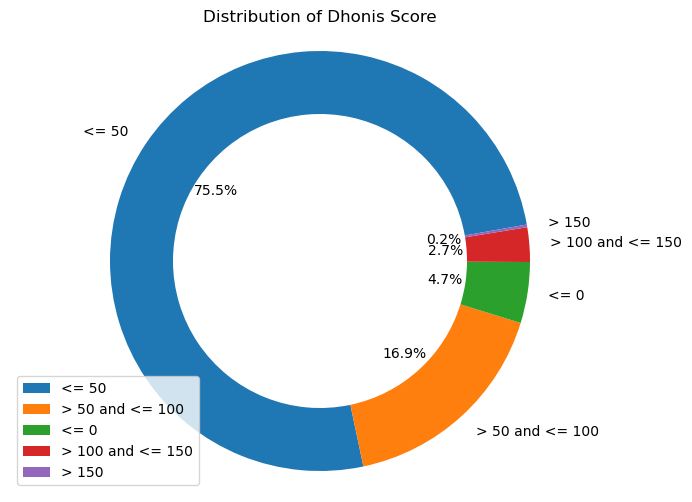

In [ ]:
plt.figure(figsize=[8, 6])
# Filter out the invalid and missing records
valid_scores = dhoni_df[dhoni_df['Dhoni_Score'].notna()]

# List to store the labels for each score range
labels = ['<= 0', '<= 50', '> 50 and <= 100', '> 100 and <= 150', '> 150']

# Count of valid scores falling into each range
count_scores = valid_scores['Dhoni_Score'].apply(lambda x: labels[0] if x <= 0 else
                                                 (labels[1] if x <= 50 else
                                                  (labels[2] if x <= 100 else
                                                   (labels[3] if x <= 150 else
                                                    labels[4])))).value_counts()

# Pie chart
_, _, autotexts = plt.pie(count_scores, labels=count_scores.index, autopct='%1.1f%%', startangle=10,wedgeprops=dict(width=0.3))

# Set the aspect ratio to be equal to ensure a circular pie
plt.axis('equal')
plt.title('Distribution of Dhonis Score')
plt.legend(count_scores.index, loc='lower left')
plt.show()


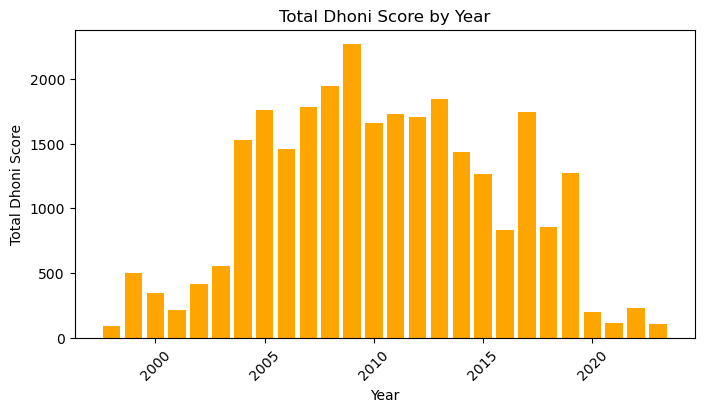

In [ ]:
plt.figure(figsize=[8, 4])

valid_scores = dhoni_df[dhoni_df['Dhoni_Score'].notna()]

grouped_data = valid_scores.groupby('Date_year')['Dhoni_Score'].sum()

# Create a bar plot
plt.bar(grouped_data.index, grouped_data,color='orange')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Dhoni Score')
plt.title('Total Dhoni Score by Year')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


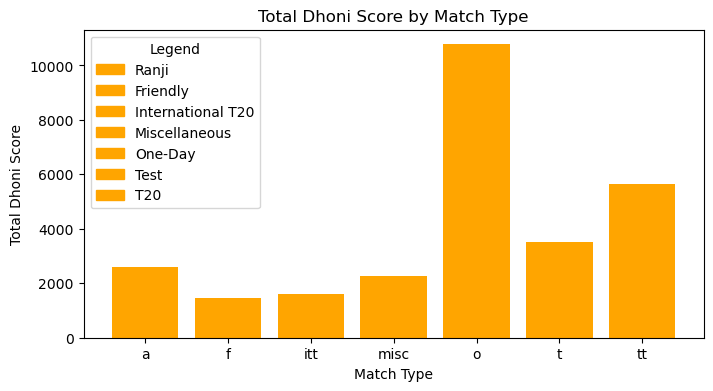

In [ ]:
plt.figure(figsize=[8, 4])
valid_scores = dhoni_df[dhoni_df['Dhoni_Score'].notna()]

grouped_data = valid_scores.groupby('Match_type')['Dhoni_Score'].sum()

# Create a bar plot
plt.bar(grouped_data.index, grouped_data, color='orange')

# Add labels and title
plt.xlabel('Match Type')
plt.ylabel('Total Dhoni Score')
plt.title('Total Dhoni Score by Match Type')

# Add legend
legend_labels = {'a': 'Ranji', 'f': 'Friendly', 'itt': 'International T20', 'misc': 'Miscellaneous', 'o': 'One-Day', 't': 'Test', 'tt': 'T20'}
legend_handles = [plt.Rectangle((0,0), 1, 1, color='orange', label=legend_labels[match_type]) for match_type in grouped_data.index]
plt.legend(handles=legend_handles, title='Legend')

# Display the plot
plt.show()


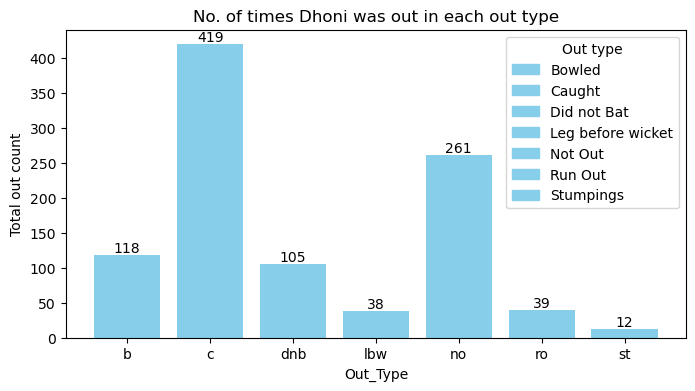

In [ ]:
plt.figure(figsize=[8, 4])

out_type_grouped = dhoni_df.groupby('Out_type')['Match'].count()

# Filter out certain categories
exclude_categories = ['rh', 'rn', 'unk']
out_type_filtered = out_type_grouped[~out_type_grouped.index.isin(exclude_categories)]

# Create a bar plot
plt.bar(out_type_filtered.index, out_type_filtered, color='skyblue')

# Add labels and title
plt.xlabel('Out_Type')
plt.ylabel('Total out count')
plt.title('No. of times Dhoni was out in each out type')

# Add legend
legend_labels = {'c': 'Caught', 'no': 'Not Out', 'b': 'Bowled', 'ro': 'Run Out', 'st': 'Stumpings', 'dnb': 'Did not Bat', 'lbw': 'Leg before wicket'}
legend_handles = [plt.Rectangle((0,0), 1, 1, color='skyblue', label=legend_labels[out_type]) for out_type in out_type_filtered.index]
plt.legend(handles=legend_handles, title='Out type', loc='upper right')

# Add count as text on top of each bar
for i, count in enumerate(out_type_filtered):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


#### There is missing data in outtype column. Hence count of out_type is less compared to the actual matches played. 

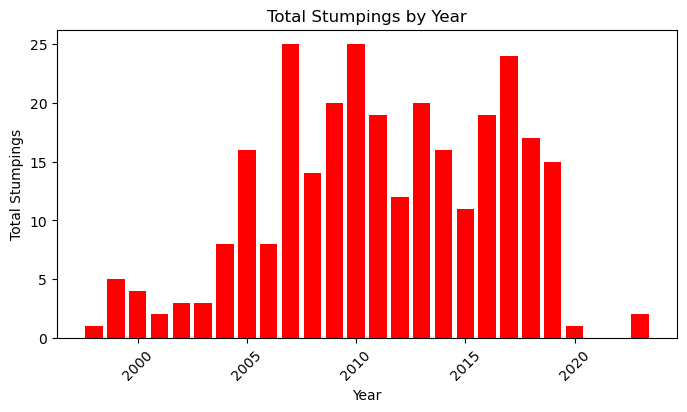

In [ ]:
plt.figure(figsize=[8, 4])
valid_stumpings = dhoni_df[dhoni_df['Stumpings'].notna()]

wickets_grouped_data = valid_stumpings.groupby('Date_year')['Stumpings'].sum()

# Create a bar plot
plt.bar(wickets_grouped_data.index, wickets_grouped_data,color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Stumpings')
plt.title('Total Stumpings by Year')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()



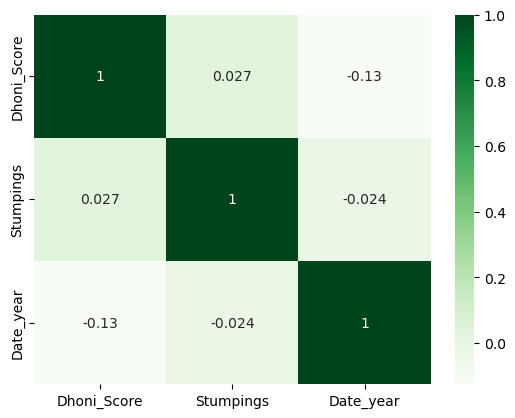

In [ ]:
sns.heatmap(dhoni_df[['Dhoni_Score','Stumpings','Date_year']].corr(),annot=True,cmap='Greens');

##### A correlation coefficient of -0.13 indicates a weak negative correlation between the two variables. The negative sign indicates an inverse relationship, meaning that as one variable increases, the other tends to decrease, and vice versa. However, the magnitude of -0.13 suggests a relatively weak correlation, indicating that the relationship between the variables is not very strong or linear. Considering the weak relationship I proceded to perform timeseries modelling to see how the score would look like by 2043.

## Key Points
1. Dhoni played his first cricket match for   
   Bihar Under19's team on 24th Oct 1998.
2. Top out type in Dhoni's career  
    Caught :474 times
    
    Bowled :129 times
    
3. Out of 1005 matches 
    (Includes T20 final 2023) Dhoni played:
    
    Did not bat: 134 times
    
    Remained Not out: 275 times. 
    
4. Highest score in Dhoni's career: 224 Runs

5. Career Peak performance: 2005 - 2017
6. Captaincy: Dhoni became captain in 2007  
   and his performance didnt drop, instead 
   his performance reached its pinnacle as a    captain. Thats why he is the greatest    
   Indian Cricket team captain, and thats why 
   CSK fans own him as 'Thala'. 
   


